In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install scikit-learn
!pip install seaborn

In [8]:
d = pd.read_csv('/content/drive/MyDrive/iris.csv')
d

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
d.shape

(150, 5)

In [10]:
d.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
d['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

#**Pre - processing**

In [13]:
d.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

#**Data Analysis**

<Axes: >

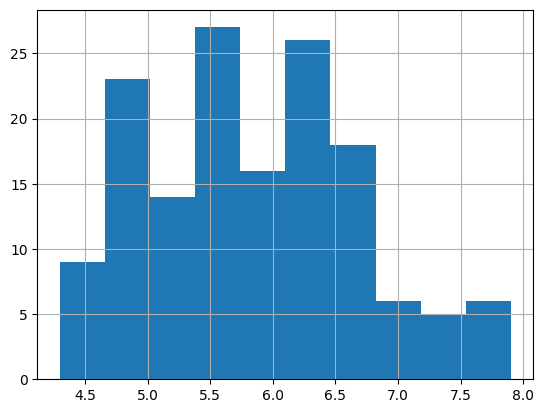

In [14]:
d['sepal.length'].hist()

<Axes: >

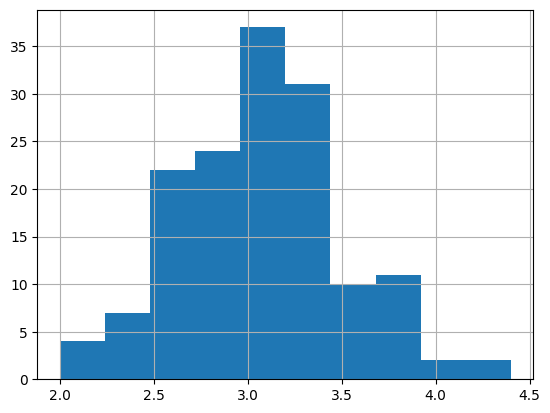

In [15]:
d['sepal.width'].hist()

<Axes: >

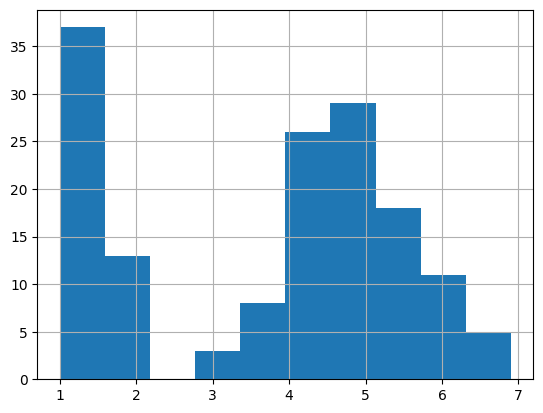

In [16]:
d['petal.length'].hist()

<Axes: >

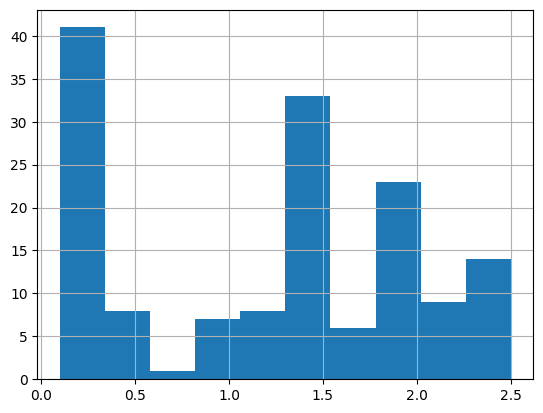

In [17]:
d['petal.width'].hist()

In [48]:
cl = ['red', 'orange', 'blue']
s = ['Virginica', 'Versicolor', 'Setosa']

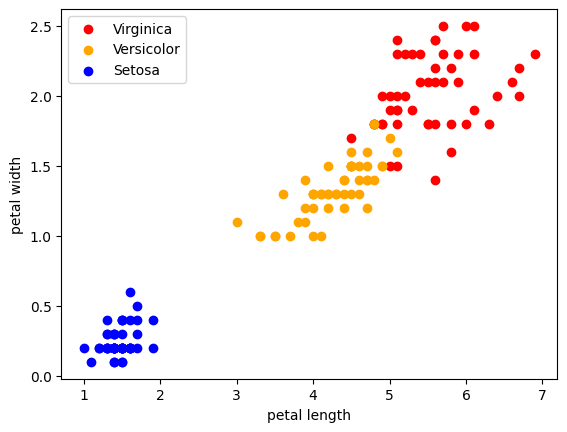

In [49]:
for i in range(3):
  x = d[d['variety'] == s[i]]
  plt.scatter(x['petal.length'], x['petal.width'], c = cl[i], label = s[i])

plt.xlabel('petal length')
plt.ylabel('petal width')

plt.legend()

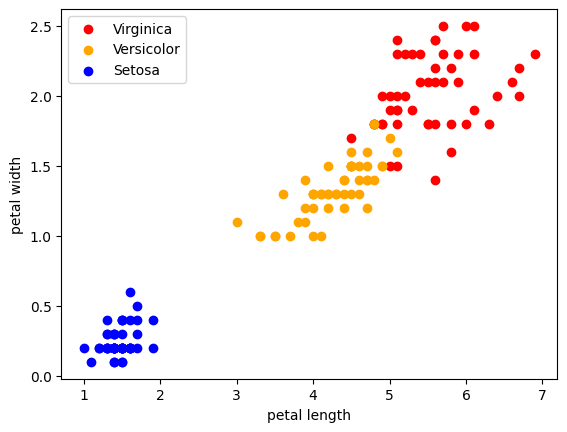

In [50]:
for i in range(3):
  x = d[d['variety'] == s[i]]
  plt.scatter(x['petal.length'], x['petal.width'], c = cl[i], label = s[i])

plt.xlabel('petal length')
plt.ylabel('petal width')

plt.legend()

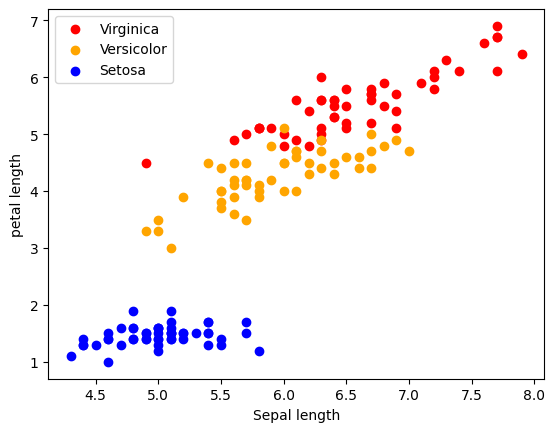

In [51]:
for i in range(3):
  x = d[d['variety'] == s[i]]
  plt.scatter(x['sepal.length'], x['petal.length'], c = cl[i], label = s[i])

plt.xlabel('Sepal length')
plt.ylabel('petal length')

plt.legend()

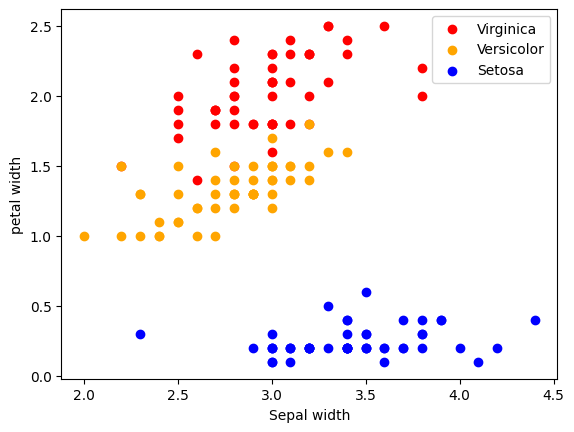

In [52]:
for i in range(3):
  x = d[d['variety'] == s[i]]
  plt.scatter(x['sepal.width'], x['petal.width'], c = cl[i], label = s[i])

plt.xlabel('Sepal width')
plt.ylabel('petal width')

plt.legend()

#**Correlation Matrix**

In [53]:
d.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

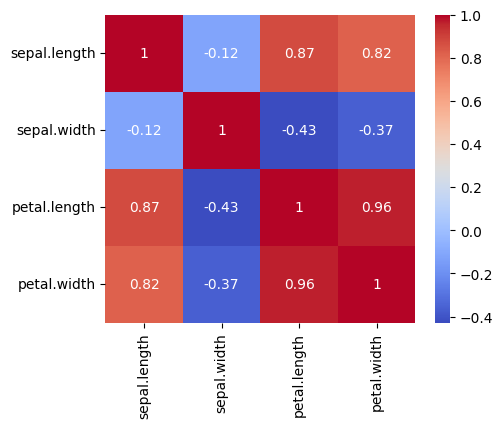

In [54]:
corr = d.corr()

fig, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

#**Model Training and Testing**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [27]:
x = d.drop(columns = ['variety'])

y = d[['variety']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("logistic Regression Accuracy: ", model.score(x_test, y_test) * 100)

logistic Regression Accuracy:  100.0
logistic Regression Accuracy:  100.0


In [30]:
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [31]:
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [32]:
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K - Neighbors Accuracy: ", model.score(x_test, y_test) * 100)

K - Neighbors Accuracy:  95.55555555555556


In [33]:
print("Accuracy: ",model.score( x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [34]:
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  97.77777777777777


In [35]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [36]:
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [37]:
import pickle
filename = "saved_model.sav"
pickle.dump(model, open(filename, 'wb'))

In [38]:
import pickle

In [39]:
filename = 'saved_model.sav'
try:
  with open(filename, 'wb') as file:
    pickle.dump(model, file)
  print("Model saved successfully")
except Exception as e:
  print(f"Error saving the model: , {e}")

Model saved successfully


In [40]:
load_model = pickle.load(open(filename, 'rb'))

In [47]:
load_model.predict([(6.0, 2,2, 4.0)])

array(['Virginica'], dtype=object)

In [44]:
import sklearn
print(sklearn.__version__)

1.2.2
